In [1]:
from bs4 import BeautifulSoup
import requests
from IPython.display import Image, display
from dotenv import load_dotenv 
import os 

In [2]:
# Load environment variables from .env file 
load_dotenv() 
# Access the variables 
BRAVE_API_KEY = os.getenv("BRAVE_API_KEY") 
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY") 
GOOGLE_SEARCH_ENGINE_ID = os.getenv("GOOGLE_SEARCH_ENGINE_ID") 

# Part 1: Search places

## Step 1: Use Brave Search API to get search results

In [3]:
def brave_search_rest(key, country, lang):
    url = "https://api.search.brave.com/res/v1/web/search"
    params = {
        "q": key,
        "country": country,
        "search_lang": lang,
        "count": 3,
        "freshness": "py",
        "result_filter": "web"
    }
    headers = {
        "X-Subscription-Token": BRAVE_API_KEY
    }
    result = requests.get(url, params, headers=headers)
    if result.status_code != 200:
        print (f"Error: {result.status_code}")
        print(result.text)
        return {}
    else:
        return result.json()

In [4]:
search_results = brave_search_rest("旺角 港式 餐廳", "HK", "zh-hant")

In [5]:
search_results

{'query': {'original': '旺角 港式 餐廳',
  'show_strict_warning': False,
  'is_navigational': False,
  'is_news_breaking': False,
  'spellcheck_off': False,
  'country': 'hk',
  'bad_results': False,
  'should_fallback': False,
  'postal_code': '',
  'city': '',
  'header_country': '',
  'more_results_available': True,
  'state': ''},
 'mixed': {'type': 'mixed',
  'main': [{'type': 'web', 'index': 0, 'all': False},
   {'type': 'web', 'index': 1, 'all': False},
   {'type': 'web', 'index': 2, 'all': False},
   {'type': 'web', 'index': 3, 'all': False},
   {'type': 'web', 'index': 4, 'all': False},
   {'type': 'web', 'index': 5, 'all': False},
   {'type': 'web', 'index': 6, 'all': False},
   {'type': 'web', 'index': 7, 'all': False},
   {'type': 'web', 'index': 8, 'all': False},
   {'type': 'web', 'index': 9, 'all': False},
   {'type': 'web', 'index': 10, 'all': False},
   {'type': 'web', 'index': 11, 'all': False},
   {'type': 'web', 'index': 12, 'all': False},
   {'type': 'web', 'index': 13, 

In [6]:
search_results_list = search_results["web"]["results"]
search_results_list[0]

{'title': '旺角Cafe推介2024｜超好坐傾偈最啱/新開必訪咖啡店 - Flow',
 'url': 'https://app.flowtheroom.com/hk/zh/blog/cafe-mongkok-foodie',
 'is_source_local': False,
 'is_source_both': False,
 'description': '眼神失焦，睡意朦朧，下午欠我一杯咖啡。 · 旺角一直是樓上 Cafe 的集中地，Flow 同大家細數必訪旺\x08角 Cafe，裝修夠靚啱晒打卡，環境亦夠舒適，適合須友人坐低飲杯latte，傾傾偈，一起走訪幾間超好坐旺角咖啡店！',
 'page_age': '2024-01-09T05:03:44',
 'profile': {'name': 'Flow',
  'url': 'https://app.flowtheroom.com/hk/zh/blog/cafe-mongkok-foodie',
  'long_name': 'app.flowtheroom.com',
  'img': 'https://imgs.search.brave.com/wFGGaaIaz2iK_ZspfjjP0NcQuEuG5zgTFe0kJvpVqCM/rs:fit:32:32:1:0/g:ce/aHR0cDovL2Zhdmlj/b25zLnNlYXJjaC5i/cmF2ZS5jb20vaWNv/bnMvYzAzN2U5NDlh/MTJiODJiMmVhZjFj/MzY1Nzg0MjgwNGRl/MGQwZDY4ZmY0MjI2/MmQ0YjhkZTU5OTg5/MmE5MTI3OS9hcHAu/Zmxvd3RoZXJvb20u/Y29tLw'},
 'language': 'zh',
 'family_friendly': True,
 'type': 'search_result',
 'subtype': 'faq',
 'is_live': False,
 'meta_url': {'scheme': 'https',
  'netloc': 'app.flowtheroom.com',
  'hostname': 'app.flowtheroom.com',
  'favicon': 'https:

## Step 1 (alt): Use Google Search API to get search results

In [7]:
def google_search_popularity(key, cr, gl, lr):
    url = "https://www.googleapis.com/customsearch/v1"
    params = {
        "cr": cr,
        "cx": GOOGLE_SEARCH_ENGINE_ID,
        "dateRestrict": "y1",
        "gl": gl,
        "lr": lr,
        "num": 3,
        "q": key,
        "key": GOOGLE_API_KEY
    }
    result = requests.get(url, params)
    if result.status_code != 200:
        print (f"Error: {result.status_code}")
        print(result.text)
        return {}
    else:
        return result.json()

In [8]:
result = google_search_popularity("旺角 港式 餐廳", "countryHK", "hk", "lang_zh-TW")

In [9]:
result

{'kind': 'customsearch#search',
 'url': {'type': 'application/json',
  'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'},
 'queries': {'request': [{'title': 'Google Custom Search - 旺角 港式 餐廳',
    'totalResults': '27500',
    'searchTerms': '旺角 港式 餐廳',
    'count': 3,
    'startIndex': 1,
    'language': 'lang_zh-TW',
    'inputEncoding': 'utf8',
    'outputEncoding': 'utf8',


In [10]:
search_results_list = result["items"]
search_results_list[0]

{'kind': 'customsearch#result',
 'title': '逾20間旺角美食推介｜旺角必吃過江龍串燒／米芝蓮甜品／打卡Café ...',
 'htmlTitle': '逾20間<b>旺角</b>美食推介｜<b>旺角</b>必吃過江龍串燒／米芝蓮甜品／打卡Café ...',
 'link': 'https://ufood.com.hk/restaurant/news/detail/20030662/%E9%80%BE10%E9%96%93%E6%97%BA%E8%A7%92%E7%BE%8E%E9%A3%9F%E6%8E%A8%E4%BB%8B-%E9%81%8E%E6%B1%9F%E9%BE%8D%E4%B8%B2%E7%87%92-%E7%B1%B3%E8%8A%9D%E8%93%AE%E7%94%9C%E5%93%81-%E6%89%93%E5%8D%A1Caf%C3%A9-%E7%88%86%E7%84%B0%E4%B8%BC%E9%A3%AF',
 'displayLink': 'ufood.com.hk',
 'snippet': 'Aug 28, 2024 ... ... 餐廳推薦｜旺角身為香港 ... 旺角有咩好食呢？是次小編推薦超過20間旺角餐廳，由價廉物美的港式餐廳、火鍋放題、日式料理、掃街小食、打卡Cafe，以至人氣甜品店都有，即睇以下旺角\xa0...',
 'htmlSnippet': 'Aug 28, 2024 <b>...</b> ... <b>餐廳</b>推薦｜<b>旺角</b>身為香港 ... <b>旺角</b>有咩好食呢？是次小編推薦超過20間<b>旺角餐廳</b>，由價廉物美的<b>港式餐廳</b>、火鍋放題、日式料理、掃街小食、打卡Cafe，以至人氣甜品店都有，即睇以下<b>旺角</b>&nbsp;...',
 'formattedUrl': 'https://ufood.com.hk/.../逾10間旺角美食推介-過江龍串燒-米芝蓮甜品-打...',
 'htmlFormattedUrl': 'https://ufood.com.hk/.../逾10間<b>旺角</b>美食推介-過江龍串燒-米芝蓮甜品-打...',
 'pagemap': {'cse_thumbnail': [{'src': 'h

## Step 2: Use BeautifulSoup to scape the links

In [11]:
def scape_website(url):
    response = requests.get(url)
    if response.status_code != 200:
        print (f"Error: {response.status_code}")
        print(response.text)
        return ""
    soup = BeautifulSoup(response.content, 'html.parser')
    text = soup.get_text()
    return text

In [12]:
urls = [item["link"] for item in search_results_list]
texts = [scape_website(url) for url in urls]

Error: 502
<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html>
<head><title>502 Bad Gateway</title><script src="//aeu.alicdn.com/waf/antidomxss_v702.js"></script><script src="//aeu.alicdn.com/waf/interfaceacting230515.js"></script></head>
<body>
<center><h1>502 Bad Gateway</h1></center>
<hr/>Powered by Tengine<hr><center>nginx</center>
</body>
</html>


In [13]:
print(urls)

['https://ufood.com.hk/restaurant/news/detail/20030662/%E9%80%BE10%E9%96%93%E6%97%BA%E8%A7%92%E7%BE%8E%E9%A3%9F%E6%8E%A8%E4%BB%8B-%E9%81%8E%E6%B1%9F%E9%BE%8D%E4%B8%B2%E7%87%92-%E7%B1%B3%E8%8A%9D%E8%93%AE%E7%94%9C%E5%93%81-%E6%89%93%E5%8D%A1Caf%C3%A9-%E7%88%86%E7%84%B0%E4%B8%BC%E9%A3%AF', 'https://www.openrice.com/zh/hongkong/r-%E6%B7%B1%E9%B4%BB%E9%A4%90%E9%A3%B2-%E6%97%BA%E8%A7%92-%E6%B8%AF%E5%BC%8F-r795827', 'https://ufood.com.hk/restaurant/news/detail/20042179/%E6%97%BA%E8%A7%92%E7%BE%8E%E9%A3%9F-%E8%80%81%E9%A6%AE%E8%8C%B6%E5%B1%85%E6%97%BA%E8%A7%92%E9%96%8B%E6%96%B0%E5%BA%97-%E4%B8%BB%E6%89%93%E6%B8%AF%E5%BC%8F%E9%BB%9E%E5%BF%83-60%E5%B9%B4%E4%BB%A3%E8%8C%B6%E6%A8%93%E8%A3%9D%E6%BD%A2']


In [31]:
for text in texts:
    print(len(text))

13763
0
4022


In [14]:
print(urls[0])

print(texts[0])

https://ufood.com.hk/restaurant/news/detail/20030662/%E9%80%BE10%E9%96%93%E6%97%BA%E8%A7%92%E7%BE%8E%E9%A3%9F%E6%8E%A8%E4%BB%8B-%E9%81%8E%E6%B1%9F%E9%BE%8D%E4%B8%B2%E7%87%92-%E7%B1%B3%E8%8A%9D%E8%93%AE%E7%94%9C%E5%93%81-%E6%89%93%E5%8D%A1Caf%C3%A9-%E7%88%86%E7%84%B0%E4%B8%BC%E9%A3%AF





逾20間旺角美食推介｜旺角必吃過江龍串燒／米芝蓮甜品／打卡Café／爆焰丼飯 | U Food



















































































































































 






























HK


Travel


Food


Beauty


Blog


e-zone






會員登入  /  登記

 



 



主頁
最Hit食訊




抵食自助餐


覓食世界


著數速遞


餐廳情報


健康食訊


掃街精選


飲食熱話





簡易廚房




入廚常識


廚具開倉


甜品糖水


食療湯水


中式食譜


素食食譜


應節食品


西式食譜


食譜合集





開箱速遞




零食達人


外賣直送


便利店新品


超市搜尋王





影片專區




最新影片


開箱速遞


廚具大發現


簡易廚房


識食攻略





打卡美食
主題特集
餐廳
美食博客




會員專區




會員活動
專享優惠

會員通訊




U Lifestyle商戶中心
關於我們




關注我們


 
  
  




立即下載U Lifestyle手機應用程式






香港經濟日報版權所有©2024




 













 





HK



Travel


# Part 2: Get place details by Google Map

## Step 3: Use Google Map API to get reviews

In [15]:
def get_google_map_place_id(keyword, region_code, language_code):
    url = "https://places.googleapis.com/v1/places:searchText"
    params = {
        "textQuery": keyword,
        "regionCode": region_code,
        "languageCode": language_code,
        "rankPreference": "RELEVANCE",
    }
    headers = {
        "X-Goog-Api-Key": GOOGLE_API_KEY,
        "X-Goog-FieldMask": "*"
    }
    result = requests.post(url, params, headers=headers)
    if result.status_code != 200:
        print (f"Error: {result.status_code}")
        print(result.text)
        return ""
    else:
        return result.json()

In [16]:
place_details = get_google_map_place_id("兩姊妹涼皮有限公司 旺角 港式 餐廳", "HK", "zh-HK")

In [41]:
place_details['places']

[{'name': 'places/ChIJwbaYjQ0BBDQRJkbKy3utATQ',
  'id': 'ChIJwbaYjQ0BBDQRJkbKy3utATQ',
  'types': ['chinese_restaurant',
   'restaurant',
   'food',
   'point_of_interest',
   'establishment'],
  'formattedAddress': '旺角黑布街99號',
  'addressComponents': [{'longText': '99號',
    'shortText': '99號',
    'types': ['street_number'],
    'languageCode': 'zh-HK'},
   {'longText': '黑布街',
    'shortText': '黑布街',
    'types': ['route'],
    'languageCode': 'zh-TW'},
   {'longText': '旺角',
    'shortText': '旺角',
    'types': ['neighborhood', 'political'],
    'languageCode': 'zh-TW'},
   {'longText': '九龍',
    'shortText': '九龍',
    'types': ['administrative_area_level_1', 'political'],
    'languageCode': 'zh-TW'},
   {'longText': '香港',
    'shortText': 'HK',
    'types': ['country', 'political'],
    'languageCode': 'zh-TW'}],
  'plusCode': {'globalCode': '7PJP859C+RV', 'compoundCode': '859C+RV 旺角'},
  'location': {'latitude': 22.3195508, 'longitude': 114.17213919999999},
  'viewport': {'low': {'l

In [39]:
place_detail = place_details['places'][0]

In [40]:
place_detail

{'name': 'places/ChIJwbaYjQ0BBDQRJkbKy3utATQ',
 'id': 'ChIJwbaYjQ0BBDQRJkbKy3utATQ',
 'types': ['chinese_restaurant',
  'restaurant',
  'food',
  'point_of_interest',
  'establishment'],
 'formattedAddress': '旺角黑布街99號',
 'addressComponents': [{'longText': '99號',
   'shortText': '99號',
   'types': ['street_number'],
   'languageCode': 'zh-HK'},
  {'longText': '黑布街',
   'shortText': '黑布街',
   'types': ['route'],
   'languageCode': 'zh-TW'},
  {'longText': '旺角',
   'shortText': '旺角',
   'types': ['neighborhood', 'political'],
   'languageCode': 'zh-TW'},
  {'longText': '九龍',
   'shortText': '九龍',
   'types': ['administrative_area_level_1', 'political'],
   'languageCode': 'zh-TW'},
  {'longText': '香港',
   'shortText': 'HK',
   'types': ['country', 'political'],
   'languageCode': 'zh-TW'}],
 'plusCode': {'globalCode': '7PJP859C+RV', 'compoundCode': '859C+RV 旺角'},
 'location': {'latitude': 22.3195508, 'longitude': 114.17213919999999},
 'viewport': {'low': {'latitude': 22.318214069708496,
 

In [42]:
place_details_reviews = place_detail['reviews']

In [43]:
place_details_reviews 

[{'name': 'places/ChIJwbaYjQ0BBDQRJkbKy3utATQ/reviews/ChZDSUhNMG9nS0VJQ0FnSUR6cUtMcGFnEAE',
  'relativePublishTimeDescription': '5 個月前',
  'rating': 4,
  'text': {'text': '兩姊妹涼皮有限公司  \r旺角黑布街99號地舖\n#兩姊妹涼皮有限公司 #重慶涼皮#涼皮#涼拌#口水雞#紅油小雲吞#旺角#food#foodie #hk\r\rHappy Friday約左食之戰友人去食飯，天氣咁熱又想平平地，即想起兩姊妹涼皮有限公司，榮獲米芝蓮必比登推介，趁今次可一試。\r\r晚上7:40到去到，唔太多人，新店裝潢簡約明亮，一目了然，牆上掛有介紹店子的報導，先點餐後就座。\r\r餐牌，第一次幫襯必試下招牌貨，有得揀要辣度，要左BB辣。\r\r招牌兩姊妹涼皮，$33，重慶涼皮，配料有大量芫荽、青瓜絲、豌豆和花生碎等，再配上秘製辣椒醋，闊身的晶瑩通透的涼皮，有少許厚度，\r口感冰涼，煙韌爽滑，因為要了BB辣食落唔係好辣，味道酸甜鹹香，清爽之感好開胃，好適合炎炎夏日食，如果揀再辣少許應該會更正呢。\r\r紅油小雲吞12顆，$40，又係要要了BB辣，細細粒易入口，皮薄內餡鮮味多汁，味道麻辣酸甜，有菜伴食，味道不俗。\r\r青瓜木耳口水雞，$30，都係要了BB辣，雞肉嫩滑，少許麻辣，辣中帶香，幾好味，木耳爽脆，青瓜清甜。\r\r無糖赤小豆薏仁去濕茶，加購$14，呢期好需要濕~~好清涼呢。\r\r美味的涼拌，環境自在，價格合理，下次有機再戰。',
   'languageCode': 'zh-Hant'},
  'originalText': {'text': '兩姊妹涼皮有限公司  \r旺角黑布街99號地舖\n#兩姊妹涼皮有限公司 #重慶涼皮#涼皮#涼拌#口水雞#紅油小雲吞#旺角#food#foodie #hk\r\rHappy Friday約左食之戰友人去食飯，天氣咁熱又想平平地，即想起兩姊妹涼皮有限公司，榮獲米芝蓮必比登推介，趁今次可一試。\r\r晚上7:40到去到，唔太多人，新店裝潢簡約明亮，一目了然，牆上掛有介紹店子的報導，先點餐後就座。\r\r餐牌，第一次幫襯必試下招牌貨，有得揀要辣度，要左BB辣。\r\r招牌

### Get ratings

In [47]:
local_ratings = [item['rating'] for item in place_details_reviews]

In [48]:
local_ratings

[4, 4, 5, 5, 4]

In [49]:
local_rating = sum(local_ratings)/len(local_ratings)

In [50]:
global_rating = place_detail['rating']

In [51]:
local_rating, global_rating

(4.4, 4.4)

### Get reviews

In [54]:
local_reviews = [item['originalText']['text'] for item in place_details_reviews]

In [55]:
local_reviews

['兩姊妹涼皮有限公司  \r旺角黑布街99號地舖\n#兩姊妹涼皮有限公司 #重慶涼皮#涼皮#涼拌#口水雞#紅油小雲吞#旺角#food#foodie #hk\r\rHappy Friday約左食之戰友人去食飯，天氣咁熱又想平平地，即想起兩姊妹涼皮有限公司，榮獲米芝蓮必比登推介，趁今次可一試。\r\r晚上7:40到去到，唔太多人，新店裝潢簡約明亮，一目了然，牆上掛有介紹店子的報導，先點餐後就座。\r\r餐牌，第一次幫襯必試下招牌貨，有得揀要辣度，要左BB辣。\r\r招牌兩姊妹涼皮，$33，重慶涼皮，配料有大量芫荽、青瓜絲、豌豆和花生碎等，再配上秘製辣椒醋，闊身的晶瑩通透的涼皮，有少許厚度，\r口感冰涼，煙韌爽滑，因為要了BB辣食落唔係好辣，味道酸甜鹹香，清爽之感好開胃，好適合炎炎夏日食，如果揀再辣少許應該會更正呢。\r\r紅油小雲吞12顆，$40，又係要要了BB辣，細細粒易入口，皮薄內餡鮮味多汁，味道麻辣酸甜，有菜伴食，味道不俗。\r\r青瓜木耳口水雞，$30，都係要了BB辣，雞肉嫩滑，少許麻辣，辣中帶香，幾好味，木耳爽脆，青瓜清甜。\r\r無糖赤小豆薏仁去濕茶，加購$14，呢期好需要濕~~好清涼呢。\r\r美味的涼拌，環境自在，價格合理，下次有機再戰。',
 '樣樣都好食\n食過好多次，仲買外賣添…\n涼皮夠清爽，夏天最啱食👍👍👍🥰🥰🥰\n小食我特別鐘愛酒香雞腳😋😋😋🍺🍺🍺\n涼面同擔擔伴面可以加好多款配菜😋😋，多到未試得哂。\n最好係辣度麻度你話事👍👍👍🥰🥰🥰，自己慢慢試啦…\n口水雞椒麻雞都好味，吾使介紹其它款，自己鐘意隨便揀。\n服務個個姐姐都好好👍👍👍\n唯一吾好處（對我），就係位置又吾緊地鐵，又吾緊彌敦道（幾個街位），行落去好熱啊👹👹👹我地住香港感覺極吾方便……',
 '23&24年米芝蓮推介，叫咗招牌涼皮+火炙豬五花+無糖赤小豆薏仁去濕茶(total $65)，個五花肉好食，真係有五層同埋有淡淡嘅豬肉味，口感一流。\n另外招牌涼皮食凍嘅，食落去勁滑，叫咗微辣，個汁除咗辣之外仲有少少酸同少少甜，成個組合都幾特別。\n絕對可以再encore，下次試吓熱食。',
 '兩姊妹涼皮有限公司 (旺角)\n\nHappy Friday 想跟朋友聚聚\n就叫朋友推介食店\n然後朋友推介了得到米芝蓮推介的\n兩姊妹涼皮有限公司\n我們去了上年年尾開的旺角店\n\n晚上7:

## Step 4: Use Google Map API to get photos

In [18]:
def get_google_map_images(place):
    url = f"https://places.googleapis.com/v1/{place}/media"
    params = {
        "maxHeightPx": 400,
        "maxWidthPx": 400,
        "key": GOOGLE_API_KEY
    }
    result = requests.get(url, params)
    if result.status_code != 200:
        print (f"Error: {result.status_code}")
        print(result.text)
        return ""
    else:
        return result.content

In [19]:
photos = place_details['places'][0]['photos']

In [20]:
photo_names = [photo['name'] for photo in photos]

In [21]:
photo_names[:3]

['places/ChIJwbaYjQ0BBDQRJkbKy3utATQ/photos/AdDdOWqfOskIJZ7l9yNiqplv0-67fUo6EZ2hzAvE6qsGJh13MizFgUDMrC8H18T7KIEvtUplGIZL53ZXxR3NxgP2MFqpcpyQ_lS0fpROY4JIQKzbfuiFFQ8o-etVlOcDMqBGbjxmAVDY3rfyl9t5MJFyzonOx4Ejnqi0gwiU',
 'places/ChIJwbaYjQ0BBDQRJkbKy3utATQ/photos/AdDdOWpgNaqNlAXyzqb3uXbSfTOv8zODhp5lUH0-bBqxrwMLX37QRIM-suJ6YW6ybdc8tjloP7dq5ZTqIc5V8vLlO-ceeBSt2ELQJv4veaDKE8jXx_sP-ByqNP8kv9OCgNrjO9EwL6_ldVpzu3iif-yLUpBZ9APATYdCkcI',
 'places/ChIJwbaYjQ0BBDQRJkbKy3utATQ/photos/AdDdOWpBWlkJCgvc2GKDi7XcokXSQUZTtbxL7SHb_dPCKNk2HfDKs3-3qdF2XJirARsEKH1YW7iSrBXUThUALvFMqlA6KGBp3pa3qz3ULPDxG96lGuCBAuK5Z-VkxwVVFAO3-tmxllVNLhLVvNTvyrEBqDshKbCwTWAh2ALj']

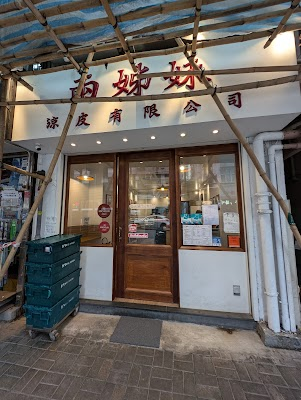

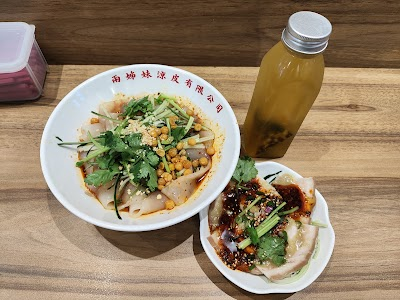

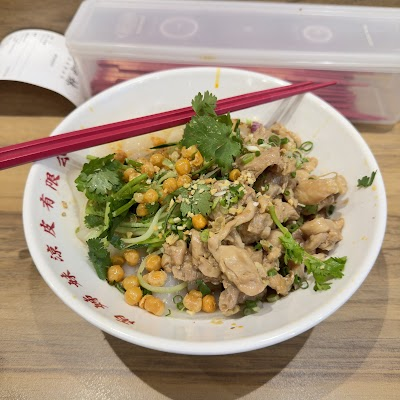

In [29]:
for photo_name in photo_names[:3]:
    display(Image(get_google_map_images(photo_name)))

# Part 3: Get place reviews by Web Search

## Step 5: Use Google Search API to get reviews

In [23]:
review_results = google_search_popularity("兩姊妹涼皮有限公司 旺角 評價", "countryHK", "hk", "lang_zh-TW")

In [24]:
review_results

{'kind': 'customsearch#search',
 'url': {'type': 'application/json',
  'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'},
 'queries': {'request': [{'title': 'Google Custom Search - 兩姊妹涼皮有限公司 旺角 評價',
    'totalResults': '281',
    'searchTerms': '兩姊妹涼皮有限公司 旺角 評價',
    'count': 3,
    'startIndex': 1,
    'language': 'lang_zh-TW',
    'inputEncoding': 'utf8',
    'outputEncodin

In [25]:
review_results_list = review_results["items"]
review_results_list[0]

{'kind': 'customsearch#result',
 'title': '兩姊妹涼皮有限公司(黑布街) – 香港旺角的港式粉麵/米線| OpenRice ...',
 'htmlTitle': '<b>兩姊妹涼皮有限公司</b>(黑布街) – 香港<b>旺角</b>的港式粉麵/米線| OpenRice ...',
 'link': 'https://www.openrice.com/zh/hongkong/r-%E5%85%A9%E5%A7%8A%E5%A6%B9%E6%B6%BC%E7%9A%AE%E6%9C%89%E9%99%90%E5%85%AC%E5%8F%B8-%E6%97%BA%E8%A7%92-%E6%B8%AF%E5%BC%8F-%E7%B2%89%E9%BA%B5-%E7%B1%B3%E7%B7%9A-r830530',
 'displayLink': 'www.openrice.com',
 'snippet': 'Mar 14, 2024 ... 兩姊妹涼皮有限公司(黑布街) 的餐廳地址、電話、食評、相片及餐牌，餐廳位於旺角黑布街99號地舖。主要菜式包括招牌兩姊妹涼皮, 。',
 'htmlSnippet': 'Mar 14, 2024 <b>...</b> <b>兩姊妹涼皮有限公司</b>(黑布街) 的餐廳地址、電話、食評、相片及餐牌，餐廳位於<b>旺角</b>黑布街99號地舖。主要菜式包括招牌兩姊妹涼皮, 。',
 'formattedUrl': 'https://www.openrice.com/.../r-兩姊妹涼皮有限公司-旺角-港式-粉麵-米線-...',
 'htmlFormattedUrl': 'https://www.openrice.com/.../r-<b>兩姊妹涼皮有限公司</b>-<b>旺角</b>-港式-粉麵-米線-...',
 'pagemap': {'cse_thumbnail': [{'src': 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSnDU-0Xp4wmcAwmkxcLW4OmVfdAl-SvrDRFvuNhVJoQwpX2xjTqE9yQ8r&s',
    'width': '201',
    'height': '

## Step 6: Use BeautifulSoup to scape the links

In [26]:
review_urls = [item["link"] for item in review_results_list]
review_texts = [scape_website(url) for url in review_urls]

Error: 502
<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html>
<head><title>502 Bad Gateway</title><script src="//aeu.alicdn.com/waf/antidomxss_v702.js"></script><script src="//aeu.alicdn.com/waf/interfaceacting230515.js"></script></head>
<body>
<center><h1>502 Bad Gateway</h1></center>
<hr/>Powered by Tengine<hr><center>nginx</center>
</body>
</html>

Error: 502
<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html>
<head><title>502 Bad Gateway</title><script src="//aeu.alicdn.com/waf/antidomxss_v702.js"></script><script src="//aeu.alicdn.com/waf/interfaceacting230515.js"></script></head>
<body>
<center><h1>502 Bad Gateway</h1></center>
<hr/>Powered by Tengine<hr><center>nginx</center>
</body>
</html>


In [27]:
print(review_urls)

['https://www.openrice.com/zh/hongkong/r-%E5%85%A9%E5%A7%8A%E5%A6%B9%E6%B6%BC%E7%9A%AE%E6%9C%89%E9%99%90%E5%85%AC%E5%8F%B8-%E6%97%BA%E8%A7%92-%E6%B8%AF%E5%BC%8F-%E7%B2%89%E9%BA%B5-%E7%B1%B3%E7%B7%9A-r830530', 'https://guide.michelin.com/hk/zh_HK/article/dining-out/bib-gourmand-twins-liangpi-limited-prince-edward', 'https://www.openrice.com/en/hongkong/r-%E5%85%A9%E5%A7%8A%E5%A6%B9%E6%B6%BC%E7%9A%AE%E6%9C%89%E9%99%90%E5%85%AC%E5%8F%B8-mong-kok-hong-kong-style-noodles-rice-noodles-r830530']


In [30]:
print(review_urls[1])
print(review_texts[1])

https://guide.michelin.com/hk/zh_HK/article/dining-out/bib-gourmand-twins-liangpi-limited-prince-edward




























粗菜精做 兩姊妹涼皮有限公司

















































                        餐廳
                    



                            酒店
                        



                        食事
                    



                        收藏夾
                    
























餐廳


餐廳


酒店


酒店


食事


食事


活動 


Best-of Guides


我的最愛


經常問的問題


聯絡我們






                            香港 - 中文
                             - HKD
                        













精湛廚藝



                            
                                4 分鐘
                            
                        



                    2024年1月18日
                

粗菜精做  兩姊妹涼皮有限公司
一般人想到四川涼皮，會想到街頭的庶民風味，米芝蓮必比登推介店家兩姊妹涼皮有限公司則將製作這種小吃的方式系統化，粗菜精做，讓小吃躍上不一樣的殿堂。




                            街頭小吃
                        

                            香港
                  